In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Integration

In [2]:
from scipy import integrate
integrate.quad(lambda x: np.sin(x), 0,1)   # returns (result, error)

(0.45969769413186023, 5.103669643922839e-15)

In [3]:
-np.cos(1) + np.cos(0)

0.45969769413186023

## Optimization

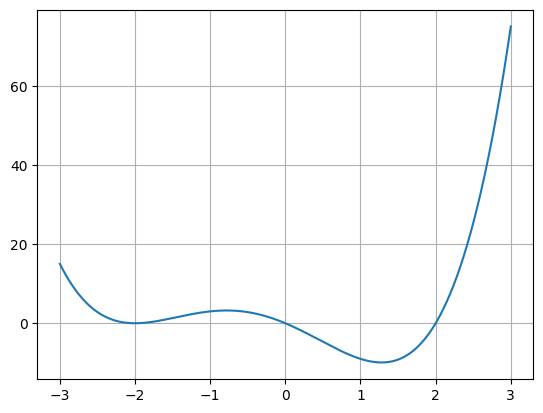

In [4]:
def f(x):
    return (x - 2) * x * (x + 2)**2
x=np.linspace(-3, 3, 1000)
plt.grid()
plt.plot(x, f(x));

In [5]:
from scipy.optimize import fsolve
fsolve(lambda x: f(x)-20, x0=2.0)  # find x such that f(x)-20=0. Initial guess: x0

array([2.42221781])

In [6]:
from scipy.optimize import minimize_scalar
print(minimize_scalar(f))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -9.914949590828147
       x: 1.2807764040333458
     nit: 11
    nfev: 14


In [12]:
print(minimize_scalar(f, bounds=(-3,-1), method='bounded'))

     fun: 3.2836517984978577e-13
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -2.000000202597239


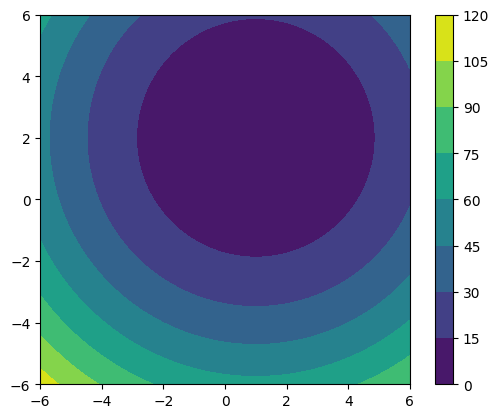

In [8]:
from scipy.optimize import minimize

def g(vars):
    x,y = vars
    return (x-1)**2 + (y-2)**2

x=np.linspace(-6, 6, 101)
y=np.linspace(-6, 6, 101)
plt.contourf(x, y, g(np.meshgrid(x,y)))
plt.axis('scaled')
plt.colorbar();

In [9]:
minimize(g, (0,0), method='Nelder-Mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.869184419935774e-09
             x: [ 1.000e+00  2.000e+00]
           nit: 66
          nfev: 127
 final_simplex: (array([[ 1.000e+00,  2.000e+00],
                       [ 1.000e+00,  2.000e+00],
                       [ 9.999e-01,  2.000e+00]]), array([ 1.869e-09,  2.928e-09,  3.002e-09]))

## Statistics

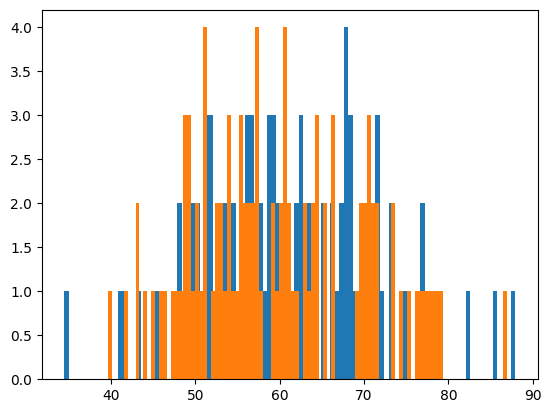

Ttest_indResult(statistic=0.8864679225144092, pvalue=0.3764408439413788)


In [10]:
from scipy.stats import ttest_ind
grades_5781 = np.random.normal(60,10,size=100)
grades_5782 = np.random.normal(60,10,size=100)
plt.hist(grades_5781, bins=100)
plt.hist(grades_5782, bins=100); plt.show()
print(ttest_ind(grades_5781, grades_5782))   # Test the hypothesis that the average grade is the same. pvalue = probility that the average is the same.